# Libraries

In [73]:
import matplotlib.pyplot as plt
import pandas 		     as pd


# Metadata

In [74]:
dataFolder = "../data/CODE15"
traceFile  = "exams_part1.hdf5"

# Data dictionary

1. **exam_id**: id used for identifying the exam;
1. **age**: patient age in years at the moment of the exam;
1. **is_male**: true if the patient is male;
1. **nn_predicted_age**: age predicted by a neural network to the patient. As described in the paper "Deep neural network estimated electrocardiographic-age as a mortality predictor" bellow.
1. **1dAVb**: Whether or not the patient has 1st degree AV block;
1. **RBBB**: Whether or not the patient has right bundle branch block;
1. **LBBB**: Whether or not the patient has left bundle branch block;
1. **SB**: Whether or not the patient has sinus bradycardia;
1. **AF**: Whether or not the patient has atrial fibrillation;
1. **ST**: Whether or not the patient has sinus tachycardia;
1. **patient_id**: id used for identifying the patient;
1. **normal_ecg**: True if automatic annotation system say it is a normal ECG;
1. **death**: true if the patient dies in the follow-up time. This data is available only in the first exam of the patient. Other exams will have this as an empty field;
1. **timey**: if the patient dies it is the time to the death of the patient. If not, it is the follow-up time. This data is available only in the first exam of the patient. Other exams will have this as an empty field;
1. **trace_file**: identify in which hdf5 file the file corresponding to this patient is located.


available at: https://zenodo.org/records/4916206

# Load dataset

In [75]:
exams = pd.read_csv(f"{ dataFolder }/exams.csv")

In [76]:
exams.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


In [77]:
exams.shape

(345779, 15)

# Preprocessing the dataset

In [78]:
exams = exams.drop(
    labels = [ 'nn_predicted_age', 'death', 'timey' ],
    axis   = 'columns'
)

In [79]:
exams.head()

,exam_id,age,is_male,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,normal_ecg,trace_file
0,1169160,38,True,False,False,False,False,False,False,523632,True,exams_part13.hdf5
1,2873686,73,True,False,False,False,False,False,False,1724173,False,exams_part13.hdf5
2,168405,67,True,False,False,False,False,False,True,51421,False,exams_part13.hdf5
3,271011,41,True,False,False,False,False,False,False,1737282,True,exams_part13.hdf5
4,384368,73,True,False,False,False,False,False,False,331652,False,exams_part13.hdf5


# Exploratory data analysis

Number of unique patients

In [80]:
exams["patient_id"].unique().shape

(233770,)

Proportion of women and men

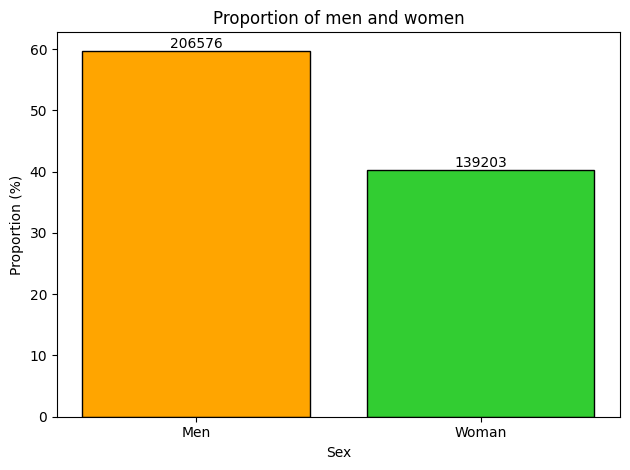

In [81]:
plt.title("Proportion of men and women")

isMaleValueCounts = exams["is_male"].value_counts()

bars = plt.bar(
    x 	   	  = ["Men", "Woman"],
    height 	  = isMaleValueCounts * 100 / exams["is_male"].count(),
    color  	  = ["orange", "limegreen"],
    edgecolor = "black"
)

for sex, bar in zip([False, True], bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = isMaleValueCounts[sex],
		ha = 'center',
		va = 'bottom'
	)


plt.xlabel("Sex")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Disease proportion

In [82]:
diseases = ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']

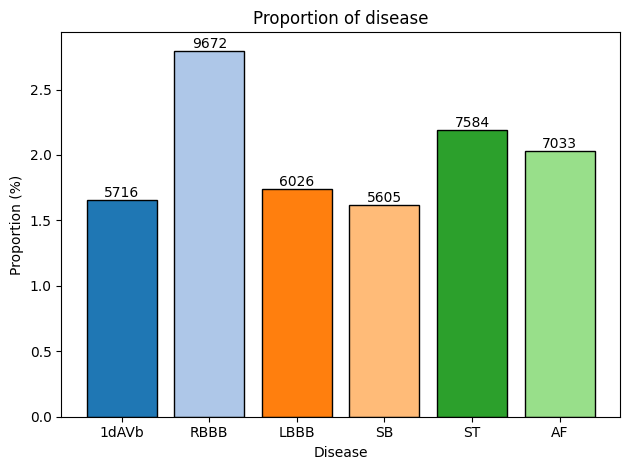

In [83]:
plt.title("Proportion of disease")

diseasesSum = exams[diseases].sum()

bars = plt.bar(
    x 	   	  = diseases,
    height 	  = diseasesSum * 100 / exams['patient_id'].count(),
    color  	  = plt.cm.tab20.colors,
    edgecolor = "black"
)

for disease, bar in zip(diseases, bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = diseasesSum[disease],
		ha = 'center',
		va = 'bottom'
	)


plt.xlabel("Disease")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Proportion of Normal ECG

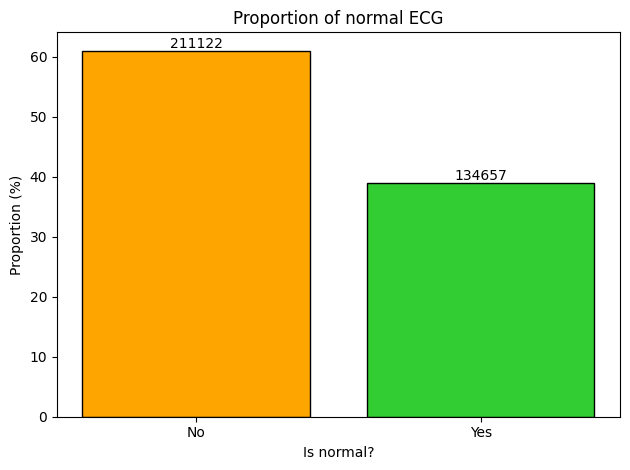

In [84]:
plt.title("Proportion of normal ECG")

isNormalValueCounts = exams["normal_ecg"].value_counts()

bars = plt.bar(
    x 	   	  = ["No", "Yes"],
    height 	  = isNormalValueCounts * 100 / exams["normal_ecg"].count(),
    color  	  = ["orange", "limegreen"],
    edgecolor = "black"
)

for isNormal, bar in zip([False, True], bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = isNormalValueCounts[isNormal],
		ha = 'center',
		va = 'bottom'
	)

plt.xlabel("Is normal?")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Histogram of ages at first examination

In [85]:
uniquePacientsExams = exams \
	.drop_duplicates(
		subset = 'patient_id',
		keep   = 'first'
	) \
	.drop(
        labels = 'patient_id', 
        axis   = 'columns'
    )

uniquePacientsExams.head()

,exam_id,age,is_male,1dAVb,RBBB,LBBB,SB,ST,AF,normal_ecg,trace_file
0,1169160,38,True,False,False,False,False,False,False,True,exams_part13.hdf5
1,2873686,73,True,False,False,False,False,False,False,False,exams_part13.hdf5
2,168405,67,True,False,False,False,False,False,True,False,exams_part13.hdf5
3,271011,41,True,False,False,False,False,False,False,True,exams_part13.hdf5
4,384368,73,True,False,False,False,False,False,False,False,exams_part13.hdf5


In [86]:
uniquePacientsAges = uniquePacientsExams['age']

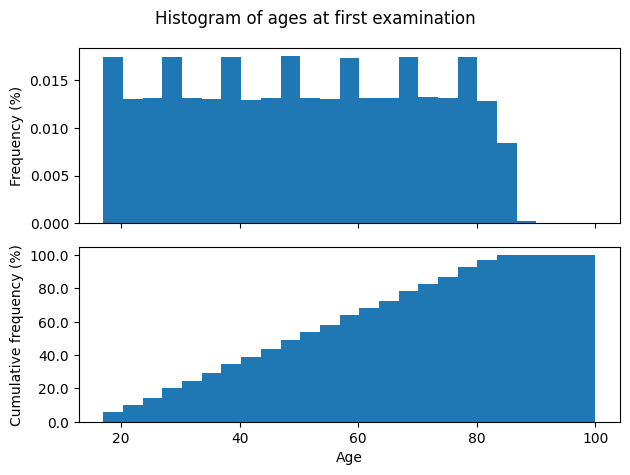

In [87]:
figure, axes = plt.subplots(
	nrows  = 2,
    ncols  = 1,
    sharex = True
)

figure.suptitle("Histogram of ages at first examination")

axes[0].hist(
    x    	= uniquePacientsAges,
    bins 	= 25,
    density = True
)
axes[1].hist(
    x    	   = uniquePacientsAges,
    bins 	   = 25,
    density    = True,
    cumulative = True
)

axes[1].yaxis.set_major_formatter(
    lambda value, _: round(100 * value, 2)
)

axes[1].set_xlabel("Age")

axes[0].set_ylabel("Frequency (%)")
axes[1].set_ylabel("Cumulative frequency (%)")

plt.tight_layout()
plt.show()

plt.close()

# Exploratory data analysis of subset

The subset

In [88]:
examsSubset = exams[exams['trace_file'] == traceFile]

Number of unique patients

In [89]:
examsSubset["patient_id"].unique().shape

(19402,)

Proportion of women and men

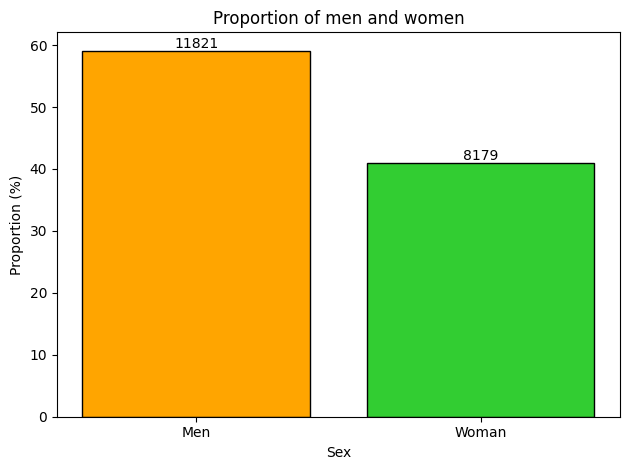

In [90]:
plt.title("Proportion of men and women")

isMaleValueCounts = examsSubset["is_male"].value_counts()

bars = plt.bar(
    x 	   	  = ["Men", "Woman"],
    height 	  = isMaleValueCounts * 100 / examsSubset["is_male"].count(),
    color  	  = ["orange", "limegreen"],
    edgecolor = "black"
)

for sex, bar in zip([False, True], bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = isMaleValueCounts[sex],
		ha = 'center',
		va = 'bottom'
	)


plt.xlabel("Sex")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Disease proportion

In [91]:
diseases = ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']

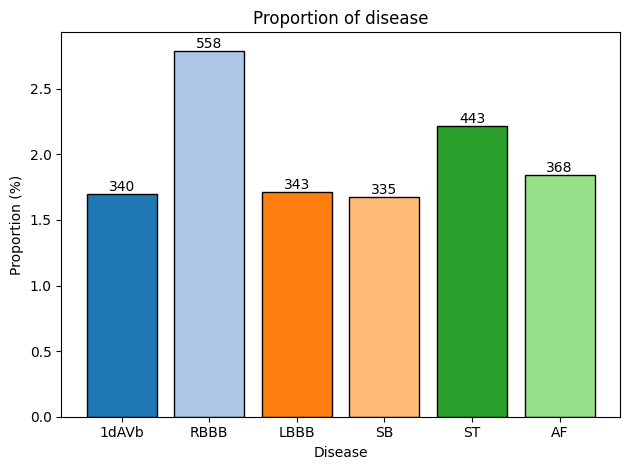

In [92]:
plt.title("Proportion of disease")

diseasesSum = examsSubset[diseases].sum()

bars = plt.bar(
    x 	   	  = diseases,
    height 	  = diseasesSum * 100 / examsSubset['patient_id'].count(),
    color  	  = plt.cm.tab20.colors,
    edgecolor = "black"
)

for disease, bar in zip(diseases, bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = diseasesSum[disease],
		ha = 'center',
		va = 'bottom'
	)


plt.xlabel("Disease")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Proportion of Normal ECG

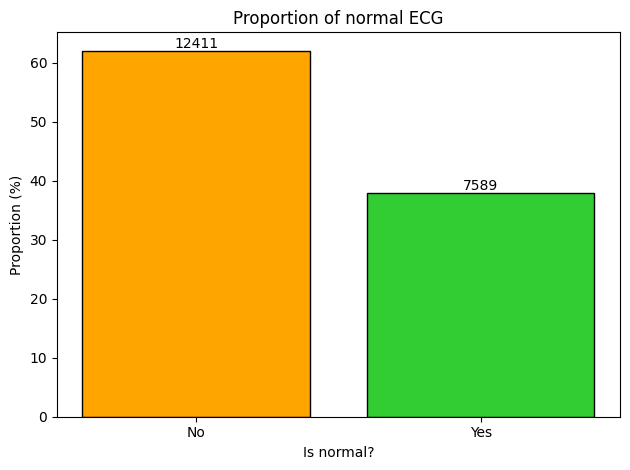

In [93]:
plt.title("Proportion of normal ECG")

isNormalValueCounts = examsSubset["normal_ecg"].value_counts()

bars = plt.bar(
    x 	   	  = ["No", "Yes"],
    height 	  = isNormalValueCounts * 100 / examsSubset["normal_ecg"].count(),
    color  	  = ["orange", "limegreen"],
    edgecolor = "black"
)

for isNormal, bar in zip([False, True], bars):
	plt.text(
		x  = bar.get_x() + bar.get_width() / 2,
		y  = bar.get_height(),
		s  = isNormalValueCounts[isNormal],
		ha = 'center',
		va = 'bottom'
	)


plt.xlabel("Is normal?")
plt.ylabel("Proportion (%)")

plt.tight_layout()
plt.show()

plt.close()

Histogram of ages at first examination

In [94]:
uniquePacientsExams = examsSubset \
	.drop_duplicates(
		subset = 'patient_id',
		keep   = 'first'
	) \
	.drop(
        labels = 'patient_id', 
        axis   = 'columns'
    )

uniquePacientsExams.head()

,exam_id,age,is_male,1dAVb,RBBB,LBBB,SB,ST,AF,normal_ecg,trace_file
1088,538053,75,False,False,False,False,False,False,False,True,exams_part1.hdf5
1089,3174141,44,True,False,False,False,False,False,False,False,exams_part1.hdf5
1090,2754653,22,True,False,False,False,False,False,False,False,exams_part1.hdf5
1091,433380,34,False,False,False,False,False,False,False,False,exams_part1.hdf5
1092,857608,50,True,False,False,False,False,False,False,True,exams_part1.hdf5


In [95]:
uniquePacientsAges = uniquePacientsExams['age']

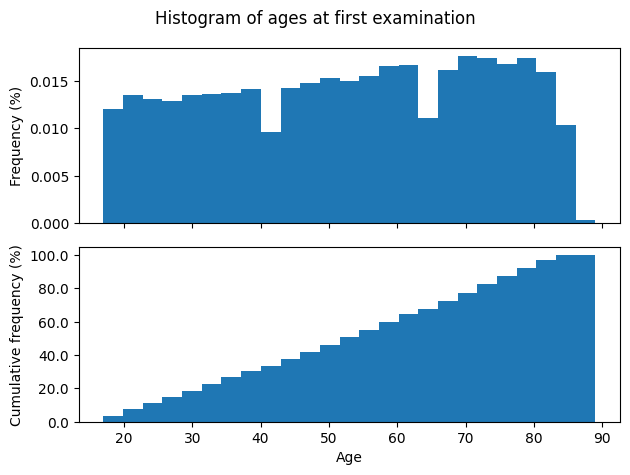

In [97]:
figure, axes = plt.subplots(
	nrows  = 2,
    ncols  = 1,
    sharex = True
)

figure.suptitle("Histogram of ages at first examination")

axes[0].hist(
    x    	= uniquePacientsAges,
    bins 	= 25,
    density = True
)
axes[1].hist(
    x    	   = uniquePacientsAges,
    bins 	   = 25,
    density    = True,
    cumulative = True
)

axes[1].yaxis.set_major_formatter(
    lambda value, _: round(100 * value, 2)
)

axes[1].set_xlabel("Age")

axes[0].set_ylabel("Frequency (%)")
axes[1].set_ylabel("Cumulative frequency (%)")

plt.tight_layout()
plt.show()

plt.close()